In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CarPrice_Assignment.csv')

In [38]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 데이터 확인
> 결측치가 없음


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [40]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 삭제할 항목 : 그냥 데이터의 설명만 보고 판단 했을시 가격에 직접적인 영향을 주지 않을 것 같은 항목
1. car_ID 
2. doornumber
3. enginelocation
4. curbweight
5. cylindernumber
6. aspiration

In [41]:
df= data.drop(['car_ID','doornumber','enginelocation','curbweight','cylindernumber'],axis=1)

In [42]:
df.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
df.shape

(205, 21)

#### 데이터 분할
1. train : 0.7, test: 0.3 

In [44]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.3, shuffle=True, random_state=2022)

print('train:',train.shape)
print('test:',test.shape)

train: (143, 21)
test: (62, 21)


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 182 to 125
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         143 non-null    int64  
 1   CarName           143 non-null    object 
 2   fueltype          143 non-null    object 
 3   aspiration        143 non-null    object 
 4   carbody           143 non-null    object 
 5   drivewheel        143 non-null    object 
 6   wheelbase         143 non-null    float64
 7   carlength         143 non-null    float64
 8   carwidth          143 non-null    float64
 9   carheight         143 non-null    float64
 10  enginetype        143 non-null    object 
 11  enginesize        143 non-null    int64  
 12  fuelsystem        143 non-null    object 
 13  boreratio         143 non-null    float64
 14  stroke            143 non-null    float64
 15  compressionratio  143 non-null    float64
 16  horsepower        143 non-null    int64  


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 36 to 38
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         62 non-null     int64  
 1   CarName           62 non-null     object 
 2   fueltype          62 non-null     object 
 3   aspiration        62 non-null     object 
 4   carbody           62 non-null     object 
 5   drivewheel        62 non-null     object 
 6   wheelbase         62 non-null     float64
 7   carlength         62 non-null     float64
 8   carwidth          62 non-null     float64
 9   carheight         62 non-null     float64
 10  enginetype        62 non-null     object 
 11  enginesize        62 non-null     int64  
 12  fuelsystem        62 non-null     object 
 13  boreratio         62 non-null     float64
 14  stroke            62 non-null     float64
 15  compressionratio  62 non-null     float64
 16  horsepower        62 non-null     int64  
 17

#### 변수별 HeatMap 상관관계 확인
1. wheelbase
- carlength 0.85
- carwidth 0.8

2. carlength
- carwidth 0.86 
- enginesize 0.67
- highwaympg -0.66

3. carwidth
- wheelbase 0.8
- carlength 0.86
- enginesize0.72
- highwaympg -0.67

4. cargine size 
- carlength 0.67
- carwidth 0.72
- hosrsepower 0.83
- citympg -0.66
- highwaympg -0.67

5. horsepower
- enginesize 0.83
- citympg -0.82
- highwaympg -0.81

6. citympg
- highwaympg 0.98

7. highwaympg 
- carlength -0.66
- carwidth -0.67
- enginesize 0.67
- horsepower -0.81
- citympg 0.98

* price
- symboling - 0.091
- carheight 0.095
- stroke 0.056
- compressionratio 0.052
- peakrpm -0.097
- highwaympg -0.69

<AxesSubplot:title={'center':'Car Correlation of Features'}>

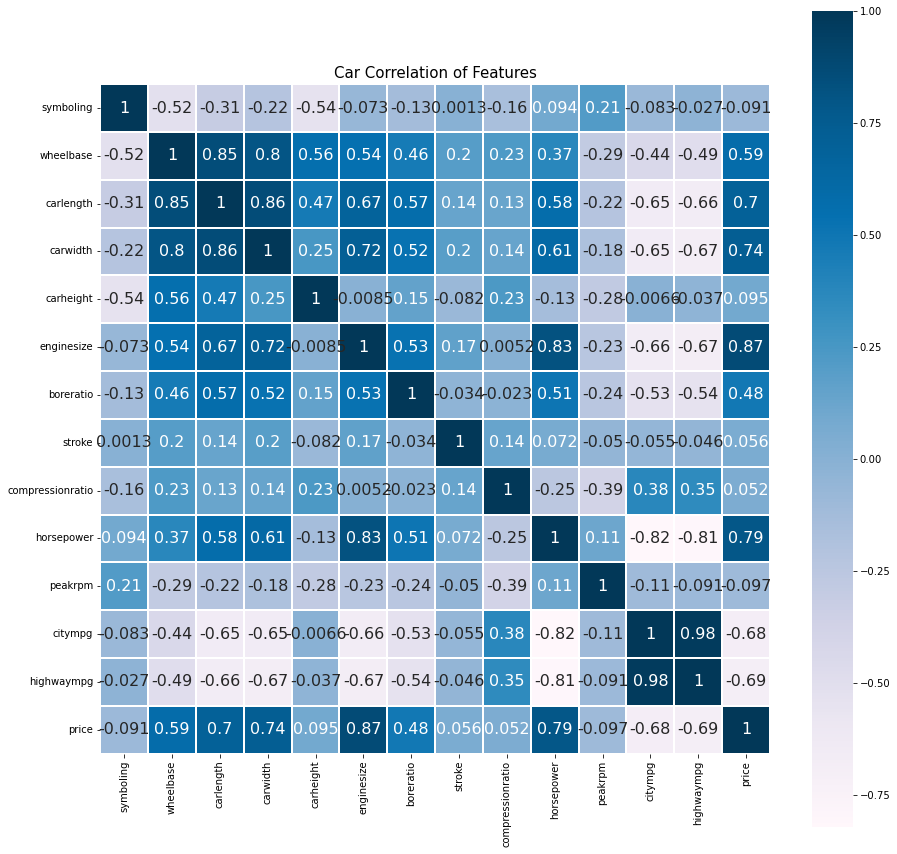

In [47]:
colormap = plt.cm.PuBu
heat_df = train.corr()
plt.figure(figsize=(15, 15))
plt.title("Car Correlation of Features", y=1.0, size = 15)
sns.heatmap(heat_df, linewidths=0.1, vmax=1.0, square =True, cmap= colormap, linecolor="white", annot=True, annot_kws={"size":16})

#### 상관관계 파악을 통한 변수 삭제
1. carlength
2. carwidth
3. engine size
4. horsepower
5. highwaympg

In [48]:
train_df= train.drop(['carlength','carwidth','enginesize','horsepower','highwaympg'],axis=1)

In [49]:
train_df.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
182,2,vokswagen rabbit,diesel,std,sedan,fwd,97.3,55.7,ohc,idi,3.01,3.40,23.0,4800,37,7775.0
99,0,nissan rogue,gas,std,hatchback,fwd,97.2,54.7,ohc,2bbl,3.33,3.47,8.5,5200,27,8949.0
0,3,alfa-romero giulia,gas,std,convertible,rwd,88.6,48.8,dohc,mpfi,3.47,2.68,9.0,5000,21,13495.0
51,1,maxda glc deluxe,gas,std,hatchback,fwd,93.1,54.1,ohc,2bbl,3.03,3.15,9.0,5000,31,6095.0
5,2,audi fox,gas,std,sedan,fwd,99.8,53.1,ohc,mpfi,3.19,3.40,8.5,5500,19,15250.0


In [50]:
test_df= test.drop(['carlength','carwidth','enginesize','horsepower','highwaympg'],axis=1)

In [51]:
test_df.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
36,0,honda civic 1500 gl,gas,std,wagon,fwd,96.5,58.3,ohc,1bbl,2.92,3.41,9.2,6000,30,7295.0
198,-2,volvo 264gl,gas,turbo,sedan,rwd,104.3,56.2,ohc,mpfi,3.62,3.15,7.5,5100,17,18420.0
102,0,nissan fuga,gas,std,wagon,fwd,100.4,56.1,ohcv,mpfi,3.43,3.27,9.0,5200,17,14399.0
146,0,subaru trezia,gas,std,wagon,fwd,97.0,53.0,ohcf,2bbl,3.62,2.64,9.0,4800,28,7463.0
79,1,mitsubishi g4,gas,turbo,hatchback,fwd,93.0,50.8,ohc,spdi,3.03,3.39,7.6,5500,24,7689.0


#### 차 이름별 분류

C:\Users\user\anaconda3\envs\py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\envs\py37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figu

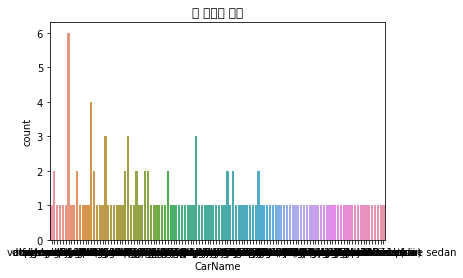

In [52]:
sns.countplot(x='CarName', data=train_df)
plt.title("차 이름별 가격")
plt.show()

In [53]:
train_df['CarInitial']= train_df.CarName.str.extract('([A-Za-z]+)\ ')

pd.crosstab(train_df.CarInitial,train_df.CarName).T.style.background_gradient(cmap='summer_r')

CarInitial,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,romero,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
CarName,,,,,,,,,,,,,,,,,,,,,,,,,,,
alfa-romero Quadrifoglio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
alfa-romero giulia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
alfa-romero stelvio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
audi 100 ls,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audi 100ls,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audi 5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audi 5000s (diesel),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audi fox,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bmw 320i,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
train_df.head()

,symboling,CarName,fueltype,aspiration,carbody,drivewheel,wheelbase,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial
182,2,vokswagen rabbit,diesel,std,sedan,fwd,97.3,55.7,ohc,idi,3.01,3.40,23.0,4800,37,7775.0,vokswagen
99,0,nissan rogue,gas,std,hatchback,fwd,97.2,54.7,ohc,2bbl,3.33,3.47,8.5,5200,27,8949.0,nissan
0,3,alfa-romero giulia,gas,std,convertible,rwd,88.6,48.8,dohc,mpfi,3.47,2.68,9.0,5000,21,13495.0,romero
51,1,maxda glc deluxe,gas,std,hatchback,fwd,93.1,54.1,ohc,2bbl,3.03,3.15,9.0,5000,31,6095.0,maxda
5,2,audi fox,gas,std,sedan,fwd,99.8,53.1,ohc,mpfi,3.19,3.40,8.5,5500,19,15250.0,audi


In [55]:
test_df['CarInitial']= test_df.CarName.str.extract('([A-Za-z]+)\ ')

pd.crosstab(test_df.CarInitial,test_df.CarName).T.style.background_gradient(cmap='summer_r')

CarInitial,Nissan,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,vw
CarName,,,,,,,,,,,,,,,,,,,,,
Nissan versa,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audi 4000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bmw 320i,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bmw x3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buick century,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buick century luxus (sw),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buick century special,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buick regal sport coupe (turbo),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chevrolet vega 2300,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
train_df2= train_df.drop(columns=['CarName'])
test_df2= test_df.drop(columns=['CarName'])

In [57]:
train_df2.head()

,symboling,fueltype,aspiration,carbody,drivewheel,wheelbase,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial
182,2,diesel,std,sedan,fwd,97.3,55.7,ohc,idi,3.01,3.40,23.0,4800,37,7775.0,vokswagen
99,0,gas,std,hatchback,fwd,97.2,54.7,ohc,2bbl,3.33,3.47,8.5,5200,27,8949.0,nissan
0,3,gas,std,convertible,rwd,88.6,48.8,dohc,mpfi,3.47,2.68,9.0,5000,21,13495.0,romero
51,1,gas,std,hatchback,fwd,93.1,54.1,ohc,2bbl,3.03,3.15,9.0,5000,31,6095.0,maxda
5,2,gas,std,sedan,fwd,99.8,53.1,ohc,mpfi,3.19,3.40,8.5,5500,19,15250.0,audi


In [58]:
test_df2.head()

,symboling,fueltype,aspiration,carbody,drivewheel,wheelbase,carheight,enginetype,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial
36,0,gas,std,wagon,fwd,96.5,58.3,ohc,1bbl,2.92,3.41,9.2,6000,30,7295.0,honda
198,-2,gas,turbo,sedan,rwd,104.3,56.2,ohc,mpfi,3.62,3.15,7.5,5100,17,18420.0,volvo
102,0,gas,std,wagon,fwd,100.4,56.1,ohcv,mpfi,3.43,3.27,9.0,5200,17,14399.0,nissan
146,0,gas,std,wagon,fwd,97.0,53.0,ohcf,2bbl,3.62,2.64,9.0,4800,28,7463.0,subaru
79,1,gas,turbo,hatchback,fwd,93.0,50.8,ohc,spdi,3.03,3.39,7.6,5500,24,7689.0,mitsubishi


In [60]:
# CarInitial 빼고 string은 지우기
train_df3=train_df2.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'],axis=1)
test_df3=test_df2.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem'],axis=1)

In [61]:
train_df3.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial
182,2,97.3,55.7,3.01,3.40,23.0,4800,37,7775.0,vokswagen
99,0,97.2,54.7,3.33,3.47,8.5,5200,27,8949.0,nissan
0,3,88.6,48.8,3.47,2.68,9.0,5000,21,13495.0,romero
51,1,93.1,54.1,3.03,3.15,9.0,5000,31,6095.0,maxda
5,2,99.8,53.1,3.19,3.40,8.5,5500,19,15250.0,audi


# CarInitial 만 onehotencoding

In [64]:
# 범주형 변수를 제거하기 위해 onehot encoding을 한다.
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(train_df3[['CarInitial']])
onehot = encoder.transform(train_df3[['CarInitial']])

onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
onehot = pd.concat([train_df3, onehot], axis=1)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
onehot.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial,...,x0_romero,x0_saab,x0_subaru,x0_toyota,x0_toyouta,x0_vokswagen,x0_volkswagen,x0_volvo,x0_vw,x0_nan
0,3.0,88.6,48.8,3.47,2.68,9.0,5000.0,21.0,13495.0,romero,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,88.6,48.8,3.47,2.68,9.0,5000.0,21.0,16500.0,romero,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,94.5,52.4,2.68,3.47,9.0,5000.0,19.0,16500.0,romero,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,99.8,54.3,3.19,3.40,10.0,5500.0,24.0,13950.0,audi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,99.4,54.3,3.19,3.40,8.0,5500.0,18.0,17450.0,audi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
onehot.isnull().sum()

symboling           43
wheelbase           43
carheight           43
boreratio           43
stroke              43
compressionratio    43
peakrpm             43
citympg             43
price               43
CarInitial          44
x0_audi             43
x0_bmw              43
x0_buick            43
x0_chevrolet        43
x0_dodge            43
x0_honda            43
x0_isuzu            43
x0_jaguar           43
x0_maxda            43
x0_mazda            43
x0_mercury          43
x0_mitsubishi       43
x0_nissan           43
x0_peugeot          43
x0_plymouth         43
x0_porcshce         43
x0_porsche          43
x0_renault          43
x0_romero           43
x0_saab             43
x0_subaru           43
x0_toyota           43
x0_toyouta          43
x0_vokswagen        43
x0_volkswagen       43
x0_volvo            43
x0_vw               43
x0_nan              43
dtype: int64

In [67]:
train_1=onehot.drop(columns=['CarInitial'])

In [68]:
train_1.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,x0_audi,...,x0_romero,x0_saab,x0_subaru,x0_toyota,x0_toyouta,x0_vokswagen,x0_volkswagen,x0_volvo,x0_vw,x0_nan
0,3.0,88.6,48.8,3.47,2.68,9.0,5000.0,21.0,13495.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,88.6,48.8,3.47,2.68,9.0,5000.0,21.0,16500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,94.5,52.4,2.68,3.47,9.0,5000.0,19.0,16500.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,99.8,54.3,3.19,3.40,10.0,5500.0,24.0,13950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,99.4,54.3,3.19,3.40,8.0,5500.0,18.0,17450.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
train_2 = train_1.dropna()

In [70]:
train_2.isnull().sum()

symboling           0
wheelbase           0
carheight           0
boreratio           0
stroke              0
compressionratio    0
peakrpm             0
citympg             0
price               0
x0_audi             0
x0_bmw              0
x0_buick            0
x0_chevrolet        0
x0_dodge            0
x0_honda            0
x0_isuzu            0
x0_jaguar           0
x0_maxda            0
x0_mazda            0
x0_mercury          0
x0_mitsubishi       0
x0_nissan           0
x0_peugeot          0
x0_plymouth         0
x0_porcshce         0
x0_porsche          0
x0_renault          0
x0_romero           0
x0_saab             0
x0_subaru           0
x0_toyota           0
x0_toyouta          0
x0_vokswagen        0
x0_volkswagen       0
x0_volvo            0
x0_vw               0
x0_nan              0
dtype: int64

In [71]:
encoder2 = OneHotEncoder()
encoder2.fit(test_df3[['CarInitial']])
onehot2 = encoder2.transform(test_df3[['CarInitial']])

onehot2 = onehot2.toarray()
onehot2 = pd.DataFrame(onehot2)
onehot2.columns = encoder2.get_feature_names()
onehot2 = pd.concat([test_df3, onehot2], axis=1)


C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [72]:
onehot2.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,CarInitial,...,x0_peugeot,x0_plymouth,x0_porsche,x0_saab,x0_subaru,x0_toyota,x0_volkswagen,x0_volvo,x0_vw,x0_nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
test_1=onehot2.drop(columns=['CarInitial'])

In [74]:
test_1.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,x0_Nissan,...,x0_peugeot,x0_plymouth,x0_porsche,x0_saab,x0_subaru,x0_toyota,x0_volkswagen,x0_volvo,x0_vw,x0_nan
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
test_1.isnull().sum()

symboling           47
wheelbase           47
carheight           47
boreratio           47
stroke              47
compressionratio    47
peakrpm             47
citympg             47
price               47
x0_Nissan           47
x0_audi             47
x0_bmw              47
x0_buick            47
x0_chevrolet        47
x0_dodge            47
x0_honda            47
x0_isuzu            47
x0_jaguar           47
x0_mazda            47
x0_mitsubishi       47
x0_nissan           47
x0_peugeot          47
x0_plymouth         47
x0_porsche          47
x0_saab             47
x0_subaru           47
x0_toyota           47
x0_volkswagen       47
x0_volvo            47
x0_vw               47
x0_nan              47
dtype: int64

In [91]:
test_2=test_1.fillna(0)

In [92]:
test_2.head()

,symboling,wheelbase,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,price,x0_Nissan,...,x0_peugeot,x0_plymouth,x0_porsche,x0_saab,x0_subaru,x0_toyota,x0_volkswagen,x0_volvo,x0_vw,x0_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### vif 검사

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=pd.DataFrame()
vif['VIF Facotr']=[variance_inflation_factor(train_2.values, i) for i in range(train_2.shape[1])]
vif['features']=train_2.columns
vif


C:\Users\user\anaconda3\envs\py37\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Facotr,features
0,2.531939,symboling
1,5.432859,wheelbase
2,2.661411,carheight
3,2.857454,boreratio
4,1.610403,stroke
5,2.368455,compressionratio
6,2.574730,peakrpm
7,4.732857,citympg
8,3.381201,price
9,228.482803,x0_audi


#### GridSearch 모델

In [94]:
X_train = train_2.drop(columns=['price'])
Y_train = train_2['price']

X_test = test_2. 

In [95]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(criterion='mse')

In [96]:
model.fit(X_train, Y_train)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse')

In [97]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion = 'mse', random_state=2022)

params = {'n_estimators': [200, 300, 500],
          'max_features': [20,30, 36],
          'min_samples_leaf': [1, 3, 5]}

greedy_CV = GridSearchCV(model, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV.fit(X_train, Y_train)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(criterion='mse',
                                             random_state=2022),
             n_jobs=-1,
             param_grid={'max_features': [20, 30, 36],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [200, 300, 500]})

In [98]:
pred = greedy_CV.predict(test_2)

C:\Users\user\anaconda3\envs\py37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
- x0_Nissan
Feature names seen at fit time, yet now missing:
- x0_maxda
- x0_mercury
- x0_porcshce
- x0_renault
- x0_romero
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 31 features, but RandomForestRegressor is expecting 36 features as input.